### Predicting Price of House using KNearestNeighbour Regressor

### Use KNearestNeighbourRegressor to Predict Price of House.

### Dataset Link:https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt

### Q1.Use pandas to get some insights into the data

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
df = pd.read_csv(url)

# Explore the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics of the dataset
print(df.describe())

# Count unique values in each column
print(df.nunique())

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)


   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000  
Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64
       Unnamed: 0         Sqft       Floor  TotalFloor     Bedroom  \
count  645.000000   645.000000  645.000000  645.000000  645.000000   
mean   325.159690  1527.656260    5.939535   10.855814    2.837209   
std    187.312152   767.386531    3.884721    4.996208    1.010740   
min      1.000000   359.358000    1.

### Q2.Show some interesting visualization of the data 

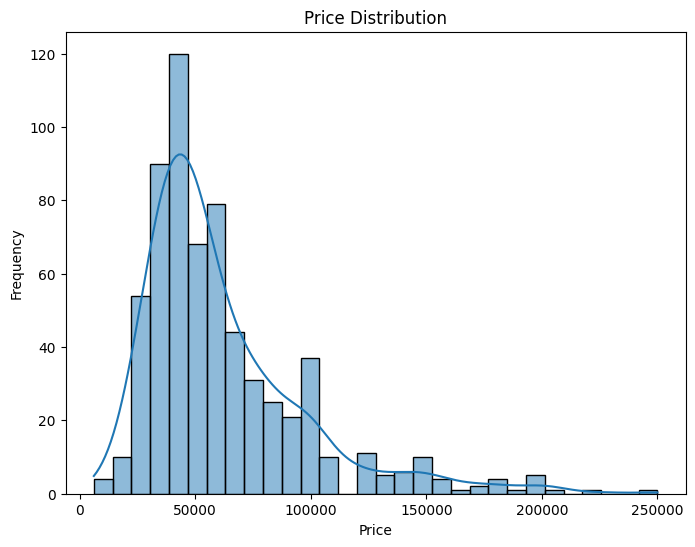

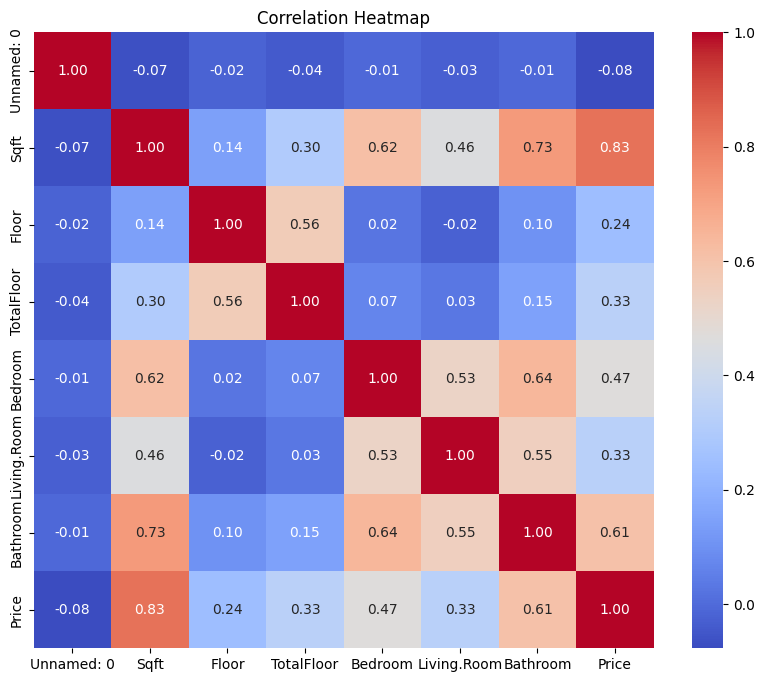

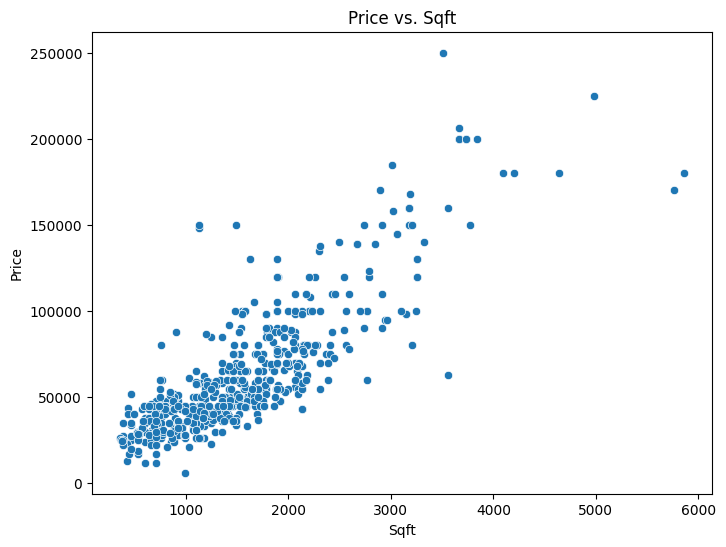

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of the distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of Price vs. Sqft
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sqft', y='Price', data=df)
plt.title('Price vs. Sqft')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()




### Q3.Manage data for training & testing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']]
y = df['Price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Q4.Finding a better value of k

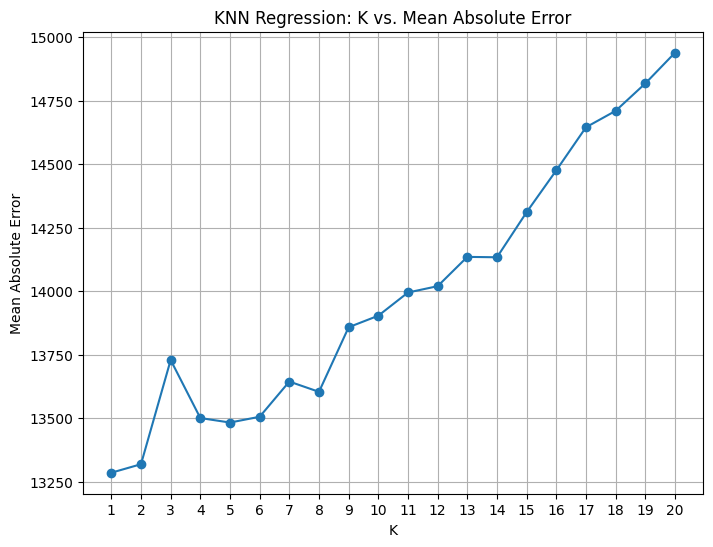

Best K value: 1


In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


knn_regressor = KNeighborsRegressor()

# Define a range of K values to try
k_values = range(1, 21)

# Cross-validation to find the best K value
mae_scores = []
for k in k_values:
    knn_regressor.n_neighbors = k
    scores = cross_val_score(knn_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores.append(-scores.mean())

# Plot the K values against the mean absolute error
plt.figure(figsize=(8, 6))
plt.plot(k_values, mae_scores, marker='o')
plt.title('KNN Regression: K vs. Mean Absolute Error')
plt.xlabel('K')
plt.ylabel('Mean Absolute Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best K value
best_k = k_values[mae_scores.index(min(mae_scores))]
print(f"Best K value: {best_k}")
